In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from collections import defaultdict

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score , GridSearchCV

from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

from collections import Counter
from collections import defaultdict

from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
%matplotlib inline
import datetime
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.metrics import f1_score, precision_score, recall_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import cross_val_predict
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.fixes import loguniform
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor


In [2]:

df_train = pd.read_csv("./X_trainc.csv",skipinitialspace=True)
df_test = pd.read_csv("./X_testc.csv",skipinitialspace=True)

In [3]:
df_train = df_train.drop(['ActivityName', 'subject'], axis = 1)
df_test = df_test.drop(['ActivityName', 'subject'],axis = 1)

In [5]:
y_train = pd.read_csv('y_train.txt', names=['Activity'])

y_test = pd.read_csv('y_test.txt', names=['Activity'])


class_mapping = {'WALKING':1,'WALKING_UPSTAIRS':2,'WALKING_DOWNSTAIRS':3,
                       'SITTING':4, 'STANDING':5,'LAYING':6}

In [6]:
X_train = df_train.drop(['Activity'], axis = 1).values
y_train = np.array(y_train)

X_test = df_test.drop(['Activity'], axis = 1).values
y_test = np.array(y_test)

ModuleNotFoundError: No module named 'xgboost'

In [107]:

#RIGHT NOW GRID SEARCH WITHOUT RFE

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import RandomizedSearchCV


# Define the parameter grid for grid search
param_dist = {
    'n_estimators': [100,150,250],
    'max_depth': [7,8,9],
    'min_samples_split': [3,4,5],
    'min_samples_leaf': [4,6,8],
    'criterion':['gini','entropy'],
    'max_features': ['sqrt', 'log2'],
    'max_samples':[0.4,0.5,0.6,0.7]
}

# Create the Random Forest classifier
clf = RandomForestClassifier(n_jobs =15, random_state = 42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_dist, cv=5, scoring = 'accuracy')
grid_search.fit(X_train, y_train)

# Get the best estimator and its corresponding predictions
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

# Evaluate the best classifier
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
classification_rep = classification_report(y_test, y_pred)

print('Best Parameters:', grid_search.best_params_)
print('Accuracy:', accuracy)
print('F1-score:', f1)
print('Classification Report:\n', classification_rep) ###
# in full '''

KeyboardInterrupt: 

In [14]:
clf = RandomForestClassifier(n_estimators=150, max_samples = 0.7, n_jobs = -1)
                            
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1_scores = f1_score(y_test, y_pred, average='macro')
classification_rep = classification_report(y_test, y_pred, target_names= class_mapping, digits = 3)

print('Accuracy:', accuracy)
print('F1-score:', f1_scores)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.9297590770274856
F1-score: 0.9290826661537114
Classification Report:
                    precision    recall  f1-score   support

           WALKING      0.923     0.992     0.956       496
  WALKING_UPSTAIRS      0.915     0.896     0.906       471
WALKING_DOWNSTAIRS      0.972     0.910     0.940       420
           SITTING      0.879     0.886     0.882       491
          STANDING      0.894     0.887     0.891       532
            LAYING      1.000     1.000     1.000       537

          accuracy                          0.930      2947
         macro avg      0.931     0.928     0.929      2947
      weighted avg      0.930     0.930     0.930      2947



Best Parameters: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2', 'max_samples': 0.7, 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 150}


In [21]:
clf = RandomForestClassifier(n_estimators=150,
                             criterion='gini',
                             max_depth=8,
                             min_samples_split=3,
                             min_samples_leaf= 4,
                             max_features='log2',
                             random_state=42,
                             max_samples = 0.7,
                             n_jobs = 15)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1_scores = f1_score(y_test, y_pred, average='macro')
classification_rep = classification_report(y_test, y_pred, target_names= class_mapping, digits = 3)

print('Accuracy:', accuracy)
print('F1-score:', f1_scores)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.9270444519850696
F1-score: 0.9258471604700845
Classification Report:
                    precision    recall  f1-score   support

           WALKING      0.921     0.992     0.955       496
  WALKING_UPSTAIRS      0.922     0.902     0.912       471
WALKING_DOWNSTAIRS      0.964     0.902     0.932       420
           SITTING      0.930     0.809     0.865       491
          STANDING      0.848     0.944     0.893       532
            LAYING      0.994     1.000     0.997       537

          accuracy                          0.927      2947
         macro avg      0.930     0.925     0.926      2947
      weighted avg      0.929     0.927     0.926      2947



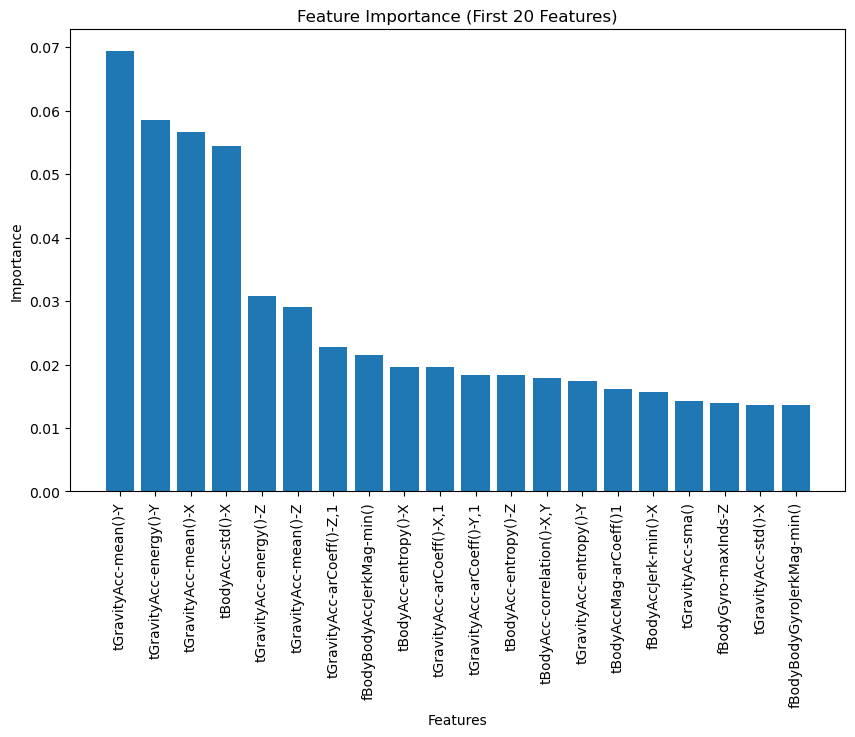

In [23]:
import matplotlib.pyplot as plt

feature_importance = clf.feature_importances_
sorted_indices = np.argsort(feature_importance)[::-1]  # Sort indices in descending order

# Select the first 20 features and their corresponding importance values
top_20_features = df_train.columns[sorted_indices][:20]
top_20_importance = feature_importance[sorted_indices][:20]

# Plotting the feature importances for the first 20 features
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_20_features)), top_20_importance)
plt.xticks(range(len(top_20_features)), top_20_features, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance (First 20 Features)')
plt.show()

In [ ]:
clf = AdaBoostClassifier(base_estimator=None, n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

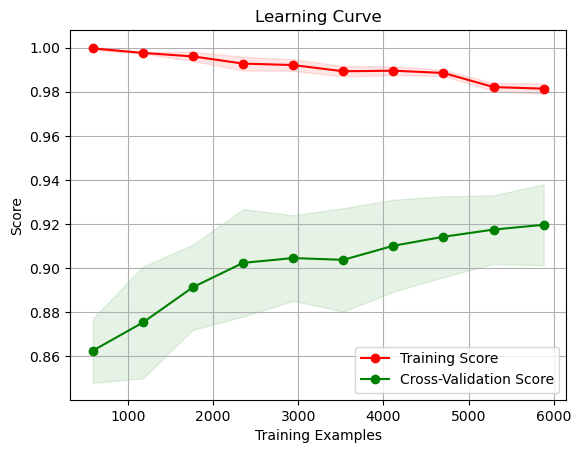

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define the classifier


# Create a learning curve
train_sizes, train_scores, test_scores = learning_curve(
    clf, X_train, y_train.ravel(), cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation of train and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.grid()
plt.fill_between(
    train_sizes, train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std, alpha=0.1, color='r'
)
plt.fill_between(
    train_sizes, test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std, alpha=0.1, color='g'
)
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-Validation Score')
plt.legend(loc='best')
plt.show()


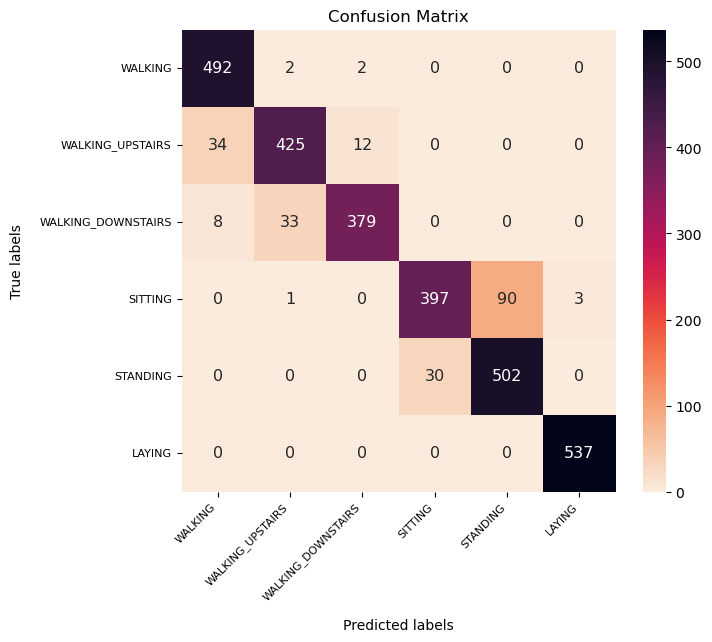

                    precision    recall  f1-score   support

           WALKING      0.921     0.992     0.955       496
  WALKING_UPSTAIRS      0.922     0.902     0.912       471
WALKING_DOWNSTAIRS      0.964     0.902     0.932       420
           SITTING      0.930     0.809     0.865       491
          STANDING      0.848     0.944     0.893       532
            LAYING      0.994     1.000     0.997       537

          accuracy                          0.927      2947
         macro avg      0.930     0.925     0.926      2947
      weighted avg      0.929     0.927     0.926      2947



In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Predict using the best model
y_pred = clf.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test.ravel(), y_pred)

# Define the inverse class mapping
inv_class_mapping = {v: k for k, v in class_mapping.items()}

# Define the class labels from unique values in y_test and y_pred
class_labels = np.unique(np.concatenate((y_test, y_pred)))

# Define the class names using inv_class_mapping and class_labels
class_names = [inv_class_mapping[label] for label in class_labels]

# Set a more contrasting color scheme
cmap = sns.color_palette('rocket_r', as_cmap=True)

# Plot the confusion matrix
plt.figure(figsize=(7, 6))
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, xticklabels=class_names, yticklabels=class_names, cmap=cmap, annot_kws={"fontsize": 11.5})

# Set x-axis label distance
ax.xaxis.labelpad = 11

# Set y-axis label distance
ax.yaxis.labelpad = 11

# Set tick label font size and distance for class names
ax.set_xticklabels(class_names, fontsize=8, rotation=45, ha='right')
ax.set_yticklabels(class_names, fontsize=8)

# Set labels and title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

plt.show()

# Print the classification report
classification_rep = classification_report(y_test.ravel(), y_pred, target_names=class_names, digits = 3)
print(classification_rep)




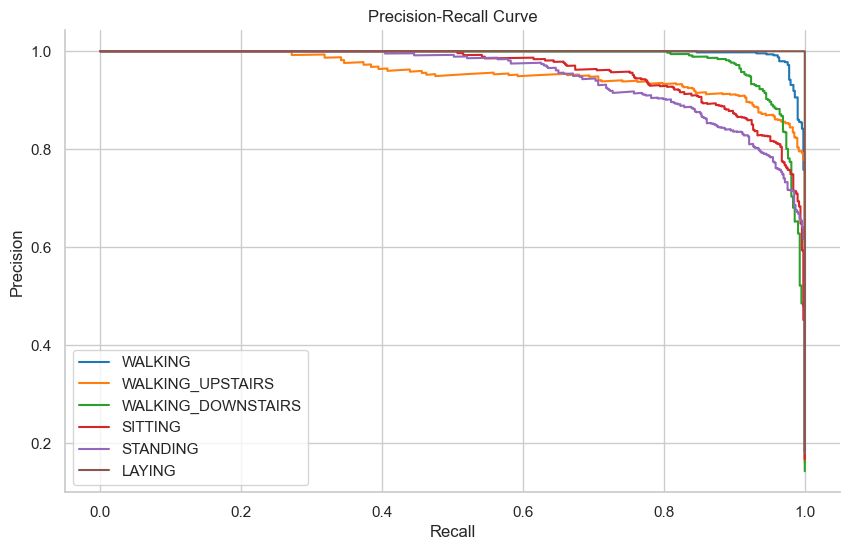

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier

# Set a seaborn style
sns.set(style="whitegrid")

# Define your classifier
clf = RandomForestClassifier(n_estimators=150,
                             criterion='gini',
                             max_depth=8,
                             min_samples_split=3,
                             min_samples_leaf=4,
                             max_features='log2',
                             random_state=42,
                             max_samples=0.7,
                             n_jobs=15)

# Assuming X_train, X_test, y_train, y_test are defined
clf.fit(X_train, y_train)

# Predict probabilities
y_scores = clf.predict_proba(X_test)

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Define your class mapping
class_mapping = {'WALKING': 1, 'WALKING_UPSTAIRS': 2, 'WALKING_DOWNSTAIRS': 3,
                 'SITTING': 4, 'STANDING': 5, 'LAYING': 6}

# Define clear colors for each class
class_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Plotting precision-recall curves
plt.figure(figsize=(10, 6))
for class_idx, class_name in class_mapping.items():
    class_label = list(class_mapping.keys()).index(class_idx)  # Convert class index to label
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, class_label], y_scores[:, class_label])
    plt.plot(recall, precision, color=class_colors[class_label], label=class_idx)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
sns.despine()
plt.show()


### TRY in SelectFromModel

In [17]:
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(RandomForestClassifier(n_estimators=150, random_state= 42))
X_train_sel = sel.fit_transform(X_train, y_train)
X_test_sel = sel.transform(X_test)
X_train_sel.shape

(7352, 44)

In [18]:
clf = RandomForestClassifier(n_estimators=150,
                             criterion='gini',
                             max_depth=9,
                             min_samples_split=3,
                             min_samples_leaf= 4,
                             max_features='log2',
                             random_state=42,
                             max_samples = 0.7,
                             n_jobs = 15)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

accuracy = accuracy_score(y_test, y_pred)
f1_scores = f1_score(y_test, y_pred, average='macro')
classification_rep = classification_report(y_test, y_pred, target_names= class_mapping)

print('Accuracy:', accuracy)
print('F1-score:', f1_scores)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.9144893111638955
F1-score: 0.9136050929241658
Classification Report:
                    precision    recall  f1-score   support

           WALKING       0.90      0.99      0.95       496
  WALKING_UPSTAIRS       0.90      0.88      0.89       471
WALKING_DOWNSTAIRS       0.97      0.89      0.93       420
           SITTING       0.87      0.83      0.85       491
          STANDING       0.85      0.88      0.87       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.91      2947
         macro avg       0.92      0.91      0.91      2947
      weighted avg       0.92      0.91      0.91      2947



In [20]:
clf = RandomForestClassifier(n_estimators=150,
                             )
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

accuracy = accuracy_score(y_test, y_pred)
f1_scores = f1_score(y_test, y_pred, average='macro')
classification_rep = classification_report(y_test, y_pred, target_names= class_mapping)

print('Accuracy:', accuracy)
print('F1-score:', f1_scores)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.9131319986426875
F1-score: 0.9121943521484939
Classification Report:
                    precision    recall  f1-score   support

           WALKING       0.91      0.99      0.95       496
  WALKING_UPSTAIRS       0.91      0.86      0.89       471
WALKING_DOWNSTAIRS       0.95      0.91      0.93       420
           SITTING       0.86      0.84      0.85       491
          STANDING       0.86      0.87      0.86       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.91      2947
         macro avg       0.91      0.91      0.91      2947
      weighted avg       0.91      0.91      0.91      2947



In [34]:

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import RandomizedSearchCV


# Define the parameter grid for grid search
param_dist = {
    'n_estimators': [50,100,150],
    'max_depth': [6,7,8],
    'min_samples_split': [3,4,5],
    'min_samples_leaf': [4,6,8],
    'criterion':['gini','entropy'],
    'max_features': ['sqrt', 'log2'],
    'max_samples':[0.4,0.5,0.6,0.7]
}

# Create the Random Forest classifier
clf = RandomForestClassifier(n_jobs =-1, random_state = 42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_dist, cv=5, scoring = 'accuracy', n_jobs = -1)
grid_search.fit(X_train_rfe, y_train)

# Get the best estimator and its corresponding predictions
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test_rfe)

# Evaluate the best classifier
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
classification_rep = classification_report(y_test, y_pred)

print('Best Parameters:', grid_search.best_params_)
print('Accuracy:', accuracy)
print('F1-score:', f1)
print('Classification Report:\n', classification_rep) ###
# in full

Best Parameters: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'log2', 'max_samples': 0.7, 'min_samples_leaf': 6, 'min_samples_split': 3, 'n_estimators': 50}
Accuracy: 0.9141499830335935
F1-score: 0.9136087633993197
Classification Report:
               precision    recall  f1-score   support

           1       0.90      1.00      0.94       496
           2       0.94      0.86      0.89       471
           3       0.96      0.92      0.94       420
           4       0.86      0.83      0.84       491
           5       0.85      0.87      0.86       532
           6       1.00      1.00      1.00       537

    accuracy                           0.91      2947
   macro avg       0.92      0.91      0.91      2947
weighted avg       0.92      0.91      0.91      2947



## SELECT FROM  MODEL
-- Best Parameters: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2', 'max_samples': 0.5, 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 50}



In [141]:
clf_sf = RandomForestClassifier(n_estimators=50,
                             criterion='gini',
                             max_depth=8,
                             min_samples_split=3,
                             min_samples_leaf= 4,
                             max_features='log2',
                             random_state=42,
                             max_samples = 0.5,
                             n_jobs = 15)
clf_sf.fit(X_train_sel, y_train)

y_pred = clf_sf.predict(X_test_sel)

accuracy = accuracy_score(y_test, y_pred)
f1_scores = f1_score(y_test, y_pred, average='macro')
classification_rep = classification_report(y_test, y_pred, target_names= class_mapping)

print('Accuracy:', accuracy)
print('F1-score:', f1_scores)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.9077027485578555
F1-score: 0.9061718271151825
Classification Report:
                    precision    recall  f1-score   support

           WALKING       0.90      1.00      0.94       496
  WALKING_UPSTAIRS       0.90      0.86      0.88       471
WALKING_DOWNSTAIRS       0.94      0.88      0.91       420
           SITTING       0.86      0.83      0.84       491
          STANDING       0.85      0.88      0.86       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.91      2947
         macro avg       0.91      0.91      0.91      2947
      weighted avg       0.91      0.91      0.91      2947



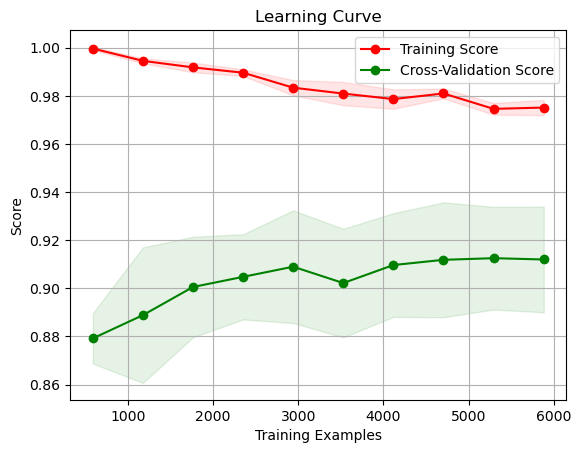

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define the classifier


# Create a learning curve
train_sizes, train_scores, test_scores = learning_curve(
    clf_40, X_train_sel, y_train.ravel(), cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10),
n_jobs = -1)

# Calculate mean and standard deviation of train and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.grid()
plt.fill_between(
    train_sizes, train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std, alpha=0.1, color='r'
)
plt.fill_between(
    train_sizes, test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std, alpha=0.1, color='g'
)
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-Validation Score')
plt.legend(loc='best')
plt.show()


In [28]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

rfe = RFE(DecisionTreeClassifier(random_state = 43), n_features_to_select=40)
X_train_rfe = rfe.fit_transform(X_train, y_train)



X_test_rfe = rfe.transform(X_test) 

X_train_sel.shape , X_test_sel.shape

((7352, 44), (2947, 44))

In [69]:
clf = RandomForestClassifier(n_estimators=150,
                             criterion='gini',
                             max_depth=8,
                             min_samples_split=3,
                             min_samples_leaf= 4,
                             max_features='log2',
                             random_state=42,
                             max_samples = 0.7,
                             n_jobs = 15)
clf.fit(X_train_rfe, y_train)

y_pred = clf.predict(X_test_rfe)

accuracy = accuracy_score(y_test, y_pred)
f1_scores = f1_score(y_test, y_pred, average='macro')
classification_rep = classification_report(y_test, y_pred, target_names= class_mapping)

print('Accuracy:', accuracy)
print('F1-score:', f1_scores)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.9172039362063115
F1-score: 0.9160853774579026
Classification Report:
                    precision    recall  f1-score   support

           WALKING       0.90      1.00      0.95       496
  WALKING_UPSTAIRS       0.91      0.86      0.89       471
WALKING_DOWNSTAIRS       0.96      0.90      0.93       420
           SITTING       0.89      0.82      0.86       491
          STANDING       0.85      0.91      0.88       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.92      2947
         macro avg       0.92      0.92      0.92      2947
      weighted avg       0.92      0.92      0.92      2947



## FOR RFE 40 

Best Parameters: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'log2', 'max_samples': 0.7, 'min_samples_leaf': 6, 'min_samples_split': 3, 'n_estimators': 50}


In [140]:
clf_40 = RandomForestClassifier(n_estimators=50,
                             criterion='entropy',
                             max_depth=8,
                             min_samples_split=3,
                             min_samples_leaf= 6,
                             max_features='log2',
                             random_state=42,
                             max_samples = 0.7,
                             n_jobs = 15)
clf_40.fit(X_train_rfe, y_train)

y_pred = clf_40.predict(X_test_rfe)

accuracy = accuracy_score(y_test, y_pred)
f1_scores = f1_score(y_test, y_pred, average='macro')
classification_rep = classification_report(y_test, y_pred, target_names= class_mapping)

print('Accuracy:', accuracy)
print('F1-score:', f1_scores)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.9141499830335935
F1-score: 0.9136087633993197
Classification Report:
                    precision    recall  f1-score   support

           WALKING       0.90      1.00      0.94       496
  WALKING_UPSTAIRS       0.94      0.86      0.89       471
WALKING_DOWNSTAIRS       0.96      0.92      0.94       420
           SITTING       0.86      0.83      0.84       491
          STANDING       0.85      0.87      0.86       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.91      2947
         macro avg       0.92      0.91      0.91      2947
      weighted avg       0.92      0.91      0.91      2947

